In [16]:
import numpy as np
import pandas as pd

In [60]:
df=pd.read_csv("./Datasets/golf.csv")

In [62]:
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [4]:
cols=list[df.columns]
print(cols)

list[Index(['Outlook', 'Temp', 'Humidity', 'Windy', 'Play Golf'], dtype='object')]


In [5]:
df.shape

(14, 5)

In [21]:
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [7]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [24]:
help(df.Outlook)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool | None' = None, fastpath: 'bool' = False) -> 'None'
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contain

In [30]:
#get correlations of each features in data set
corrmat=df.corr()
top_corr_features=corrmat.index

<Axes: >

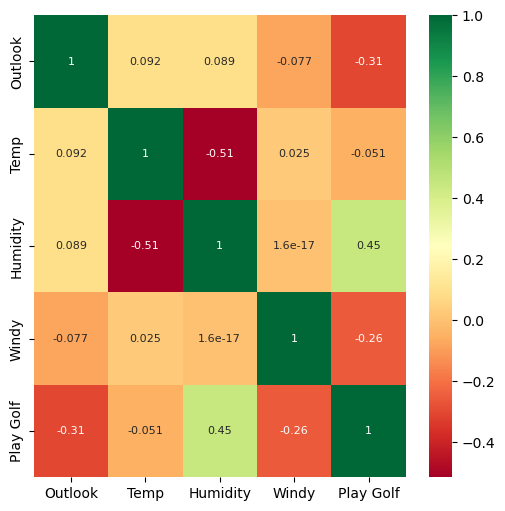

In [31]:
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlGn", annot_kws={"fontsize":8})

<Axes: >

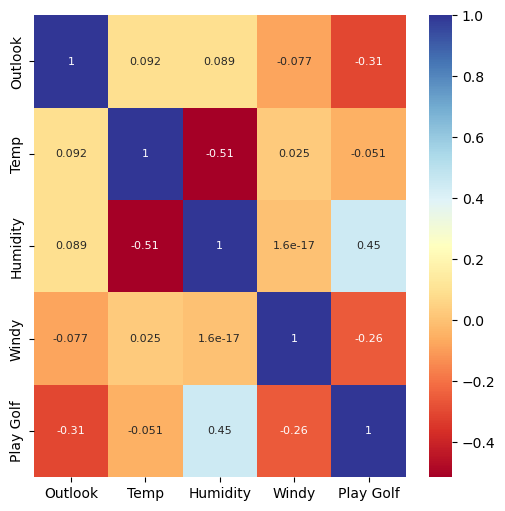

In [32]:
#get correlations of each features in data set
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="RdYlBu", annot_kws={"fontsize":8})

In [27]:
# feature_cols= df.columns.drop(['bp_diastolic', 'skin_triceps', 'label'] ) # requirement
# print(feature_cols)

for i in df.columns:
    print(i, ":", sorted(df[i].unique()))

Outlook : ['Overcast', 'Rainy', 'Sunny']
Temp : ['Cool', 'Hot', 'Mild']
Humidity : ['High', 'Normal']
Windy : [False, True]
Play Golf : ['No', 'Yes']


In [29]:
df[df.columns] = df[df.columns].apply(lambda clm:pd.Categorical(clm).codes).replace(-1,np.nan)
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [34]:
feature_cols = df.columns.drop('Play Golf')

In [35]:
from sklearn.model_selection import train_test_split

In [39]:
#dataFrame
X=df[feature_cols] #Features
#series
y=df['Play Golf'] # one word p h tw single suse kr skte hn  #Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 30)

In [40]:
len(y_train)

10

In [41]:
len(y_test)

4

In [42]:
from sklearn.naive_bayes import GaussianNB
clf= GaussianNB()

In [43]:
#Train Classifer 
model = clf.fit(X_train, y_train)

In [44]:
#predict the response for test dataset
y_pred = model.predict(X_test)

In [45]:
len(y_pred)

4

In [46]:
len(y_test)

4

In [47]:
y=pd.DataFrame({'Orignal': y_test , 'Predicted' : y_pred})
y.head()

,Orignal,Predicted
0,0,1
9,1,1
11,1,1
8,1,1


In [48]:
y.tail()

,Orignal,Predicted
0,0,1
9,1,1
11,1,1
8,1,1


In [50]:
y.sample(2)

,Orignal,Predicted
11,1,1
0,0,1


In [51]:
from sklearn import metrics


In [63]:
result= metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[0 1]
 [0 3]]


In [64]:
def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize=(4,4))
    c_mtrx= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

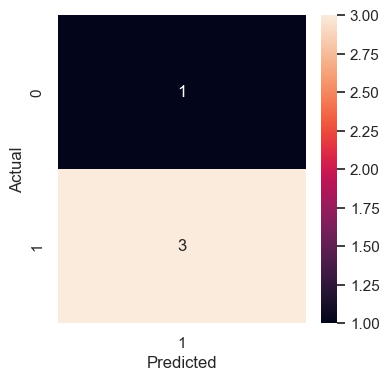

In [65]:
plt1()

In [66]:
#[row, column]
#(Actual, Predict)
TN= result[0,0]; FP=result[0,1]
FN= result[1,0]; TP=result[1,1]

print("TN: ", TN, "\tFP: ", FP)
print("FN: ", FN, "\tTP: ", TP)

TN:  0 	FP:  1
FN:  0 	TP:  3


In [67]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix
Accuracy:	 0.75
Sensitivity:	 1.0
Specificity:	 0.0
Precision:	 0.75
Classification Eerror: 0.25
False_Positive_Rate: 1.0


In [127]:
#get total number  of o in the actual dataset
count0=df['label'][df.label==0].count()
#get total number of 0 in the actual Data Set 
count1= df['label'] [df.label==1].count()
print("Actual DataSet ")
print("0's:", count0)
print("1's:", count1)

Actual DataSet 
0's: 500
1's: 268


In [129]:
#get total number  of 0 in the training Data Set
Trcount0= y_train[y_train == 0].count()
#get total number  of 0 in the training dataset
Trcount1= y_train[y_train == 1].count()

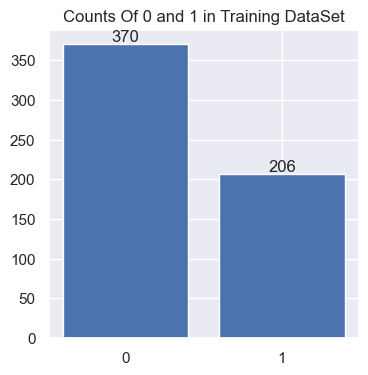

In [143]:
#plotting the Bar Chart 
labels= ['0', '1']
counts= [Trcount0, Trcount1]
plt.figure(figsize=(4,4))
plt.title('Counts Of 0 and 1 in Training DataSet')
plt.bar(labels, counts)
#Add annotations to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()